In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import math

In [2]:
%matplotlib inline

In [3]:
from utils.config import DATAFOLDER, SVM_PARAM, OPTIMIZER
from models.Regressor import getmodel, myCallbacks

In [4]:
file_loc = os.path.join(DATAFOLDER, "main.csv")
df = pd.read_csv(file_loc)

In [5]:
outlier = []
for counter, i in enumerate(df['Wind speed']):
    if i > 10.0:
        outlier.append(counter)
print(outlier)
df = df.drop(outlier,axis=0)

[2314, 2448, 3062]


In [6]:
df = df.drop(columns=['date']).dropna()

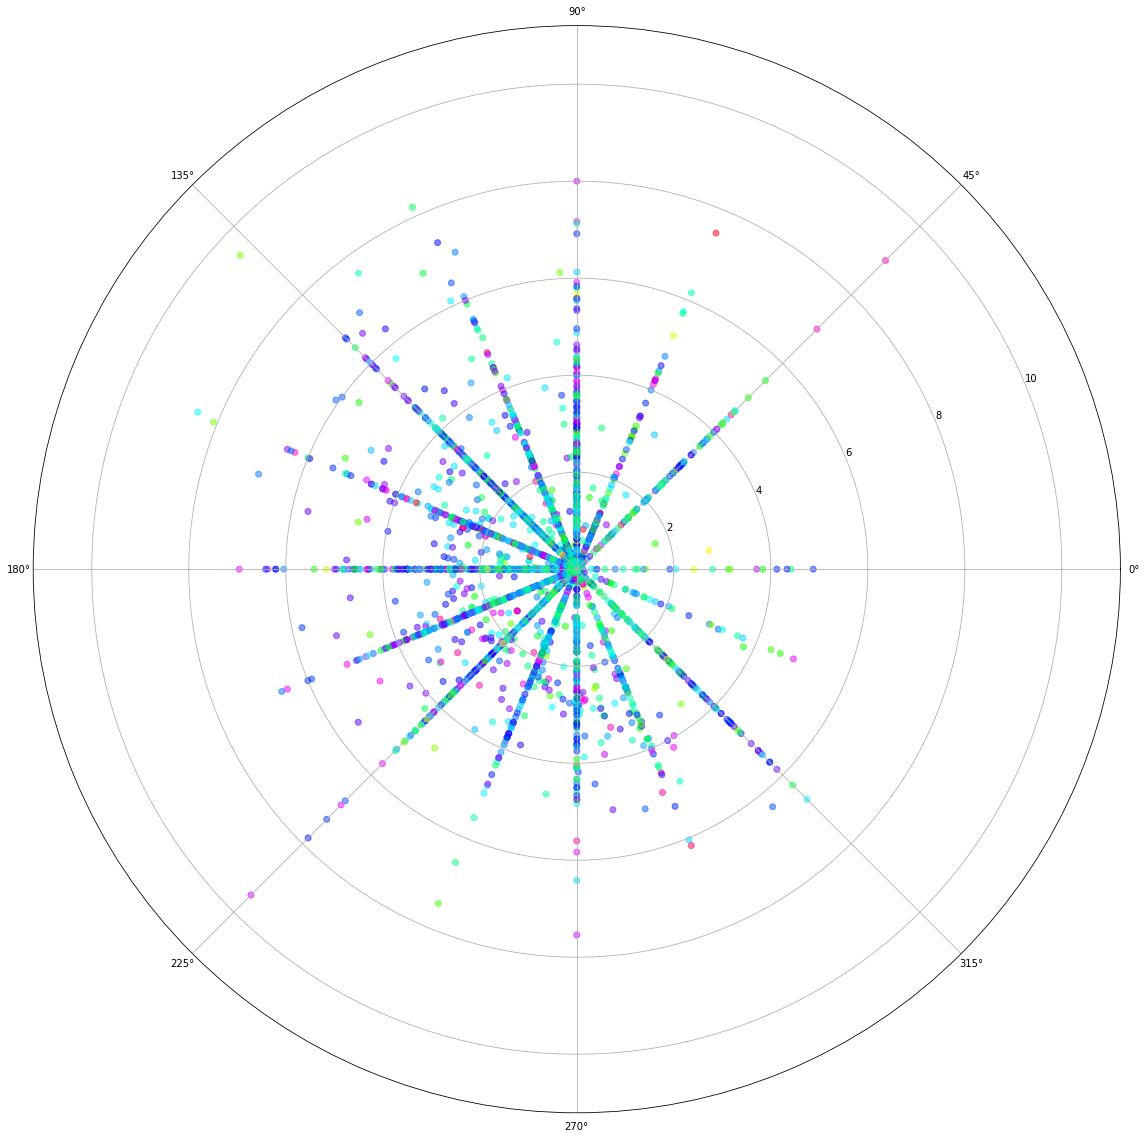

In [7]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter([x*math.pi/180 for x in df["Wind Direction"]], df["Wind speed"], c=df["Solar Radiation"], cmap='hsv', alpha=0.5)

In [8]:
df.corr()

,Rainfall,Max Temperature,Min Temperature,Maximum Humidity,Min Humidity,Wind Direction,CC,EVP,Wind speed,Solar Radiation
Rainfall,1.000000,0.002751,0.133891,0.138639,0.218776,-0.073258,0.305291,0.001167,0.057769,-0.060207
Max Temperature,0.002751,1.000000,0.820558,-0.324380,-0.271306,-0.080119,-0.156977,0.577631,0.157445,0.662621
Min Temperature,0.133891,0.820558,1.000000,-0.162438,0.029321,-0.178664,0.164272,0.501490,0.151894,0.435273
Maximum Humidity,0.138639,-0.324380,-0.162438,1.000000,0.415221,-0.034516,0.223267,-0.315577,-0.041323,-0.427212
Min Humidity,0.218776,-0.271306,0.029321,0.415221,1.000000,-0.153890,0.402844,-0.191415,-0.256619,-0.365928
Wind Direction,-0.073258,-0.080119,-0.178664,-0.034516,-0.153890,1.000000,-0.140985,-0.072918,0.006598,-0.027590
CC,0.305291,-0.156977,0.164272,0.223267,0.402844,-0.140985,1.000000,-0.101180,0.055222,-0.392639
EVP,0.001167,0.577631,0.501490,-0.315577,-0.191415,-0.072918,-0.101180,1.000000,0.088191,0.480045
Wind speed,0.057769,0.157445,0.151894,-0.041323,-0.256619,0.006598,0.055222,0.088191,1.000000,0.154366
Solar Radiation,-0.060207,0.662621,0.435273,-0.427212,-0.365928,-0.027590,-0.392639,0.480045,0.154366,1.000000


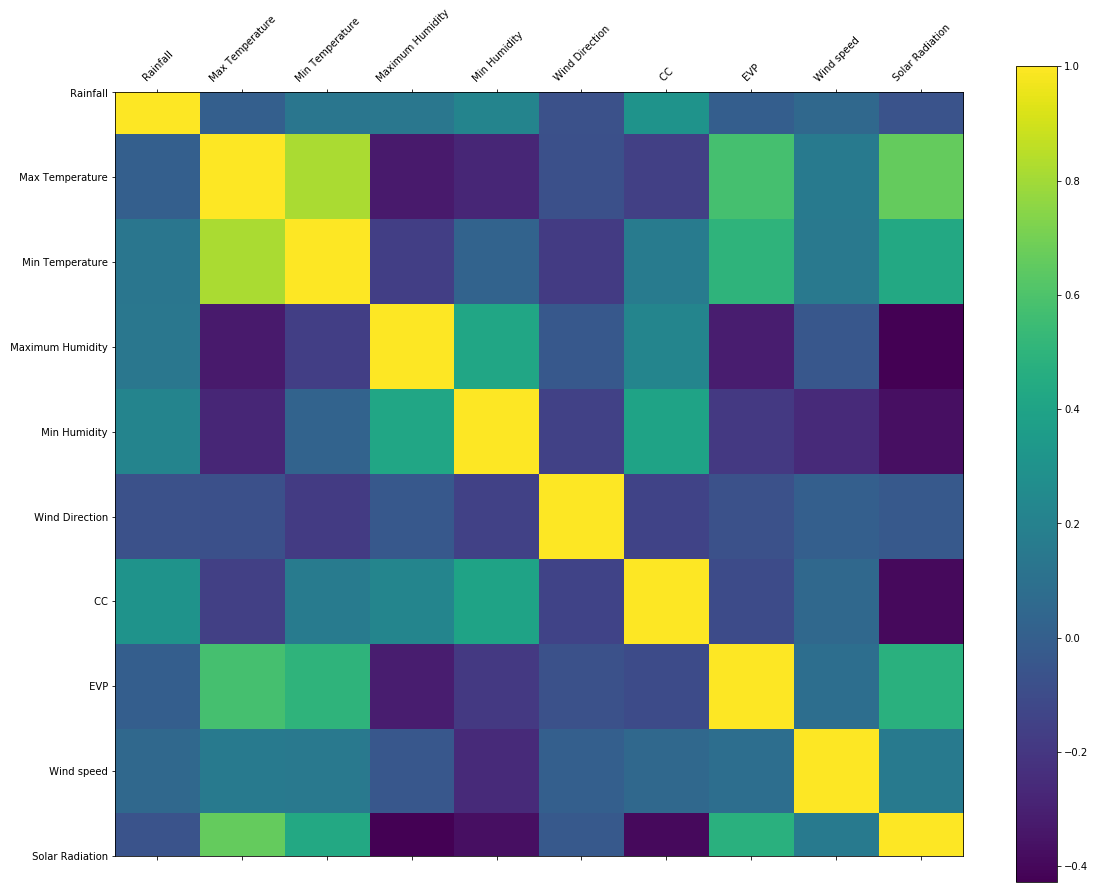

In [9]:
f = plt.figure(figsize=(19, 15))
ax = f.add_subplot(111)
cax = ax.matshow(df.corr(), interpolation='nearest')
f.colorbar(cax)
ax.set_xticks(range(0,10))
ax.set_yticks(range(0,10))
ax.set_xticklabels(" " + df.corr().columns, rotation=45)
ax.set_yticklabels(" " + df.corr().columns)
plt.show()

## Preprocessing of data

In [10]:
Y = df["Wind speed"]
X = df.drop(columns=["Wind speed"])

In [11]:
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [12]:
# y = np.reshape(Y.values, (len(Y.values),1))
# min_max_scaler = MinMaxScaler()
# y_scaled = min_max_scaler.fit_transform(y)
# Y = pd.DataFrame(y_scaled)

In [13]:
X.describe()

,0,1,2,3,4,5,6,7,8
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,0.009967,0.614833,0.550883,0.165386,0.409928,0.498357,0.251821,0.227589,0.572726
std,0.045648,0.172182,0.225972,0.059971,0.246171,0.206955,0.288314,0.107639,0.173097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.494681,0.369906,0.125000,0.211111,0.358333,0.000000,0.153846,0.445338
50%,0.000000,0.654255,0.592476,0.184524,0.388889,0.500000,0.125000,0.203846,0.558824
75%,0.000000,0.736702,0.749216,0.211310,0.577778,0.625000,0.375000,0.288462,0.682353
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
Y.describe()

count    3041.000000
mean        2.045339
std         1.562091
min         0.000000
25%         0.791667
50%         1.875000
75%         3.000000
max         9.500000
Name: Wind speed, dtype: float64

## Normalised prediction using features

In [15]:
from utils.helper import Plotter
from sklearn.model_selection import train_test_split
plotter = Plotter()

In [16]:
X_val = X[-10:]
Y_val = Y[-10:]



X_train, X_test, Y_train, Y_test = train_test_split(X[0:-10],Y[0:-10], test_size=0.2, random_state = 42)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2424, 9)
(2424,)
(607, 9)
(607,)


{'e': 0.5, 's': 0.5, 'c': 100}
-----------------------------------------------------------
MSE: 1.9801334064466163 MAE: 1.0324765564808025 R2: 0.16986337912098948
-----------------------------------------------------------


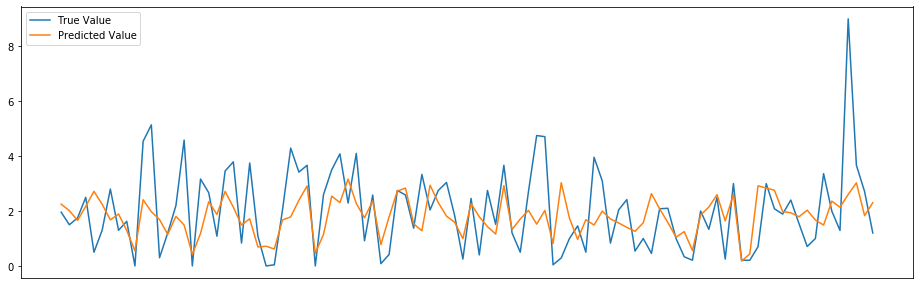

{'e': 1, 's': 1, 'c': 100}
-----------------------------------------------------------
MSE: 1.9700770991208754 MAE: 1.0550969912417636 R2: 0.17407931172165814
-----------------------------------------------------------


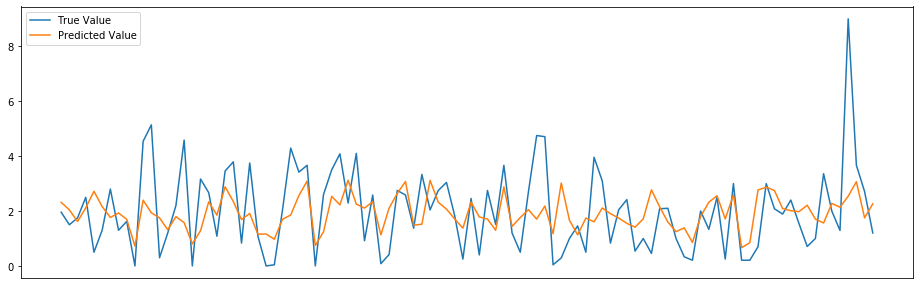

{'e': 0.5, 's': 1, 'c': 500}
-----------------------------------------------------------
MSE: 1.9929351195481229 MAE: 1.015884088638663 R2: 0.16449648271847994
-----------------------------------------------------------


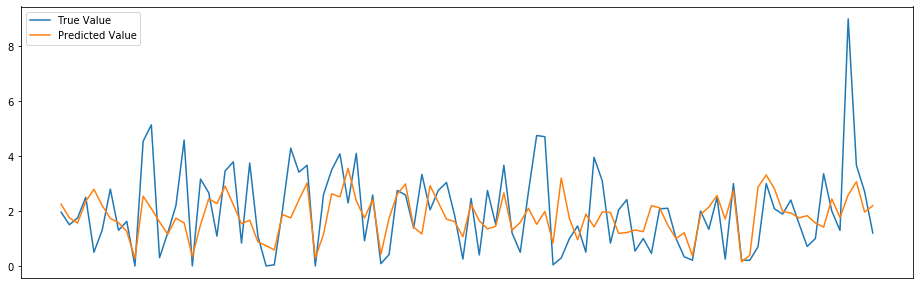

{'e': 0.5, 's': 1, 'c': 1000}
-----------------------------------------------------------
MSE: 2.030714044644357 MAE: 1.0089939066403346 R2: 0.14865832296736103
-----------------------------------------------------------


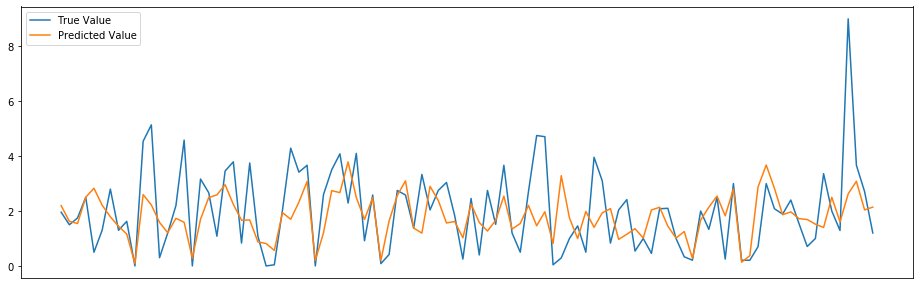

In [18]:
from sklearn import svm
for i in SVM_PARAM:
    print(i)
    svr = svm.SVR(C=i['c'], epsilon=i['e'], gamma="auto", coef0=i['s'])
    svr.fit(X_train, Y_train)
    plotter.find_accurracy_on_testset(svr, X_test, Y_test,clip=True, plot=True)
#     plotter.find_accurracy_on_testset(svr, X_val, Y_val,clip=False, plot= True)

------------------------------------------
RMSprop
------------------------------------------

The mean absolute error for epoch 0 is    1.37 and mean squared error is    3.23.
The mean absolute error for epoch 1 is    1.25 and mean squared error is    2.41.
The mean absolute error for epoch 2 is    1.21 and mean squared error is    2.29.
The mean absolute error for epoch 3 is    1.20 and mean squared error is    2.27.
The mean absolute error for epoch 4 is    1.15 and mean squared error is    2.12.
The mean absolute error for epoch 5 is    1.17 and mean squared error is    2.24.
The mean absolute error for epoch 6 is    1.16 and mean squared error is    2.16.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.26.
The mean absolute error for epoch 8 is    1.14 and mean squared error is    2.07.
The mean absolute error for epoch 9 is    1.16 and mean squared error is    2.13.
The mean absolute error for epoch 10 is    1.13 and mean squared error is    2.05.
Th

W0825 21:25:58.832200  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 23 is    1.10 and mean squared error is    1.96.
The mean absolute error for epoch 24 is    1.15 and mean squared error is    2.13.
-----------------------------------------------------------
MSE: 1.98455309612743 MAE: 1.09212374159907 R2: 0.1680105008022763
-----------------------------------------------------------


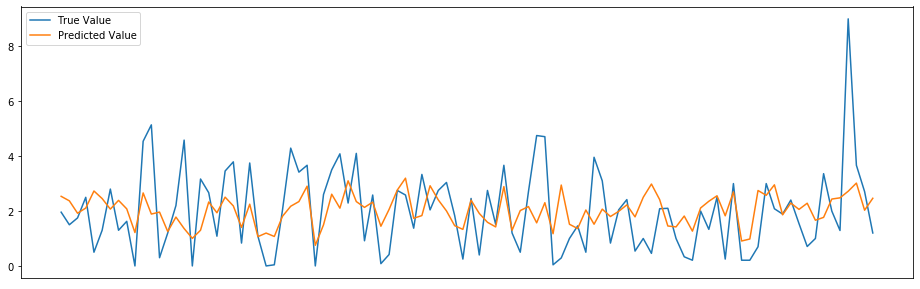






------------------------------------------
SGD
------------------------------------------

The mean absolute error for epoch 0 is    1.43 and mean squared error is    3.48.
The mean absolute error for epoch 1 is    1.22 and mean squared error is    2.30.
The mean absolute error for epoch 2 is    1.21 and mean squared error is    2.25.
The mean absolute error for epoch 3 is    1.24 and mean squared error is    2.34.
The mean absolute error for epoch 4 is    1.18 and mean squared error is    2.21.
The mean absolute error for epoch 5 is    1.22 and mean squared error is    2.33.
The mean absolute error for epoch 6 is    1.19 and mean squared error is    2.21.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.22.
The mean absolute error for epoch 8 is    1.19 and mean squared error is    2.23.
The mean absolute error for epoch 9 is    1.17 and mean squared error is    2.15.
The mean absolute error for epoch 10 is    1.19 and mean squared error is    2.24.
T

W0825 21:26:01.425257  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 20 is    1.14 and mean squared error is    2.05.
The mean absolute error for epoch 21 is    1.17 and mean squared error is    2.18.
The mean absolute error for epoch 22 is    1.15 and mean squared error is    2.12.
The mean absolute error for epoch 23 is    1.16 and mean squared error is    2.14.
The mean absolute error for epoch 24 is    1.18 and mean squared error is    2.26.
-----------------------------------------------------------
MSE: 2.0801349275368066 MAE: 1.1304239651486048 R2: 0.1279394741303942
-----------------------------------------------------------


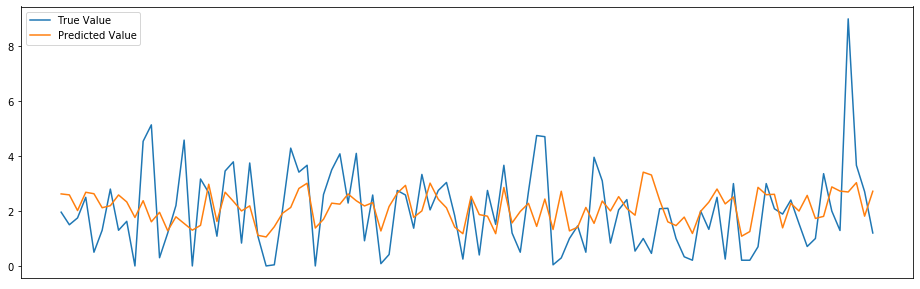






------------------------------------------
Adagrad
------------------------------------------

The mean absolute error for epoch 0 is    1.31 and mean squared error is    2.87.
The mean absolute error for epoch 1 is    1.22 and mean squared error is    2.36.
The mean absolute error for epoch 2 is    1.20 and mean squared error is    2.26.
The mean absolute error for epoch 3 is    1.18 and mean squared error is    2.21.
The mean absolute error for epoch 4 is    1.21 and mean squared error is    2.28.
The mean absolute error for epoch 5 is    1.19 and mean squared error is    2.25.
The mean absolute error for epoch 6 is    1.16 and mean squared error is    2.08.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.26.
The mean absolute error for epoch 8 is    1.19 and mean squared error is    2.27.
The mean absolute error for epoch 9 is    1.18 and mean squared error is    2.24.
The mean absolute error for epoch 10 is    1.16 and mean squared error is    2.0

W0825 21:26:04.142873  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 23 is    1.15 and mean squared error is    2.11.
The mean absolute error for epoch 24 is    1.16 and mean squared error is    2.14.
-----------------------------------------------------------
MSE: 2.106660717013694 MAE: 1.155627792203206 R2: 0.11681899650459293
-----------------------------------------------------------


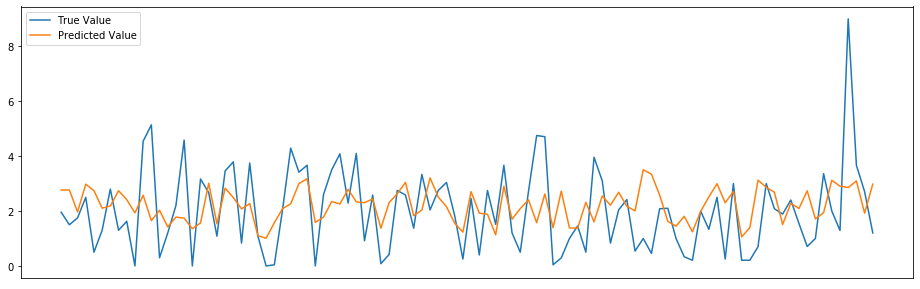






------------------------------------------
Adadelta
------------------------------------------

The mean absolute error for epoch 0 is    1.84 and mean squared error is    5.55.
The mean absolute error for epoch 1 is    1.30 and mean squared error is    2.75.
The mean absolute error for epoch 2 is    1.25 and mean squared error is    2.48.
The mean absolute error for epoch 3 is    1.25 and mean squared error is    2.51.
The mean absolute error for epoch 4 is    1.19 and mean squared error is    2.20.
The mean absolute error for epoch 5 is    1.23 and mean squared error is    2.39.
The mean absolute error for epoch 6 is    1.22 and mean squared error is    2.32.
The mean absolute error for epoch 7 is    1.17 and mean squared error is    2.18.
The mean absolute error for epoch 8 is    1.19 and mean squared error is    2.28.
The mean absolute error for epoch 9 is    1.19 and mean squared error is    2.32.
The mean absolute error for epoch 10 is    1.20 and mean squared error is    2.

W0825 21:26:06.445505  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 22 is    1.14 and mean squared error is    2.06.
The mean absolute error for epoch 23 is    1.14 and mean squared error is    2.15.
The mean absolute error for epoch 24 is    1.12 and mean squared error is    1.98.
-----------------------------------------------------------
MSE: 2.0479241586409866 MAE: 1.0825410431098659 R2: 0.1414432808739382
-----------------------------------------------------------


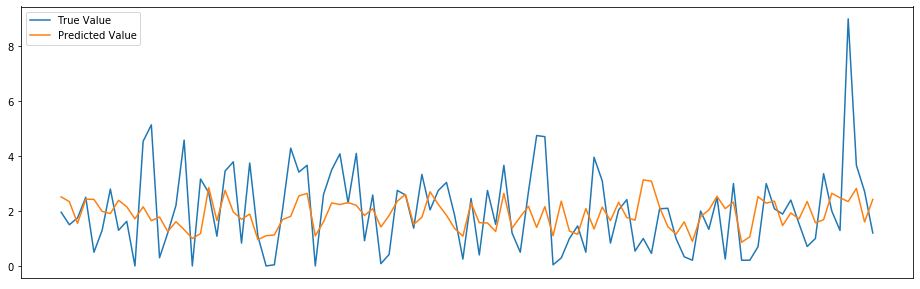






------------------------------------------
Adam
------------------------------------------

The mean absolute error for epoch 0 is    1.54 and mean squared error is    3.99.
The mean absolute error for epoch 1 is    1.32 and mean squared error is    2.69.
The mean absolute error for epoch 2 is    1.20 and mean squared error is    2.23.
The mean absolute error for epoch 3 is    1.22 and mean squared error is    2.34.
The mean absolute error for epoch 4 is    1.15 and mean squared error is    2.04.
The mean absolute error for epoch 5 is    1.19 and mean squared error is    2.25.
The mean absolute error for epoch 6 is    1.17 and mean squared error is    2.21.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.19.
The mean absolute error for epoch 8 is    1.15 and mean squared error is    2.12.
The mean absolute error for epoch 9 is    1.14 and mean squared error is    2.05.
The mean absolute error for epoch 10 is    1.15 and mean squared error is    2.07.


W0825 21:26:10.476926  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    1.13 and mean squared error is    2.03.
-----------------------------------------------------------
MSE: 1.975783750305579 MAE: 1.0816461680237897 R2: 0.17168689709162255
-----------------------------------------------------------


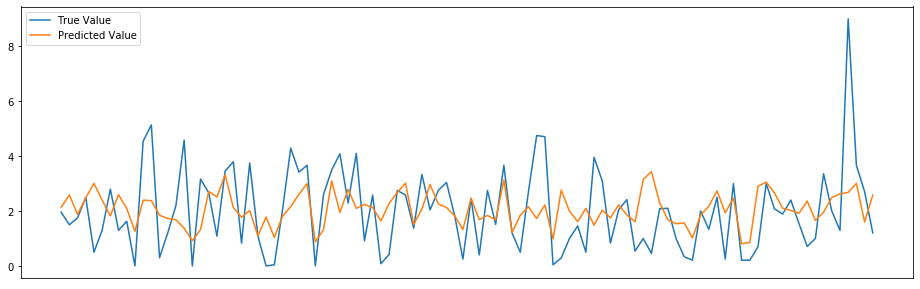






------------------------------------------
Adamax
------------------------------------------

The mean absolute error for epoch 0 is    1.57 and mean squared error is    4.21.
The mean absolute error for epoch 1 is    1.28 and mean squared error is    2.48.
The mean absolute error for epoch 2 is    1.19 and mean squared error is    2.20.
The mean absolute error for epoch 3 is    1.21 and mean squared error is    2.29.
The mean absolute error for epoch 4 is    1.18 and mean squared error is    2.19.
The mean absolute error for epoch 5 is    1.17 and mean squared error is    2.16.
The mean absolute error for epoch 6 is    1.19 and mean squared error is    2.23.
The mean absolute error for epoch 7 is    1.14 and mean squared error is    2.10.
The mean absolute error for epoch 8 is    1.18 and mean squared error is    2.20.
The mean absolute error for epoch 9 is    1.16 and mean squared error is    2.12.
The mean absolute error for epoch 10 is    1.16 and mean squared error is    2.14

W0825 21:26:14.259555  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 23 is    1.11 and mean squared error is    1.95.
The mean absolute error for epoch 24 is    1.11 and mean squared error is    2.02.
-----------------------------------------------------------
MSE: 2.06236181089487 MAE: 1.124221227592805 R2: 0.13539054532771433
-----------------------------------------------------------


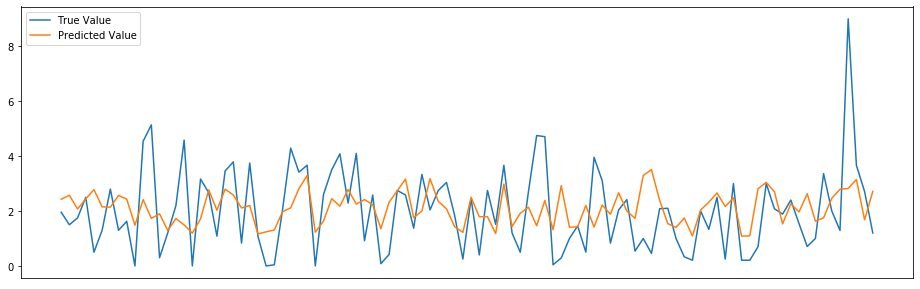






------------------------------------------
Nadam
------------------------------------------

The mean absolute error for epoch 0 is    1.32 and mean squared error is    2.83.
The mean absolute error for epoch 1 is    1.22 and mean squared error is    2.34.
The mean absolute error for epoch 2 is    1.17 and mean squared error is    2.24.
The mean absolute error for epoch 3 is    1.20 and mean squared error is    2.27.
The mean absolute error for epoch 4 is    1.15 and mean squared error is    2.11.
The mean absolute error for epoch 5 is    1.16 and mean squared error is    2.18.
The mean absolute error for epoch 6 is    1.16 and mean squared error is    2.11.
The mean absolute error for epoch 7 is    1.19 and mean squared error is    2.27.
The mean absolute error for epoch 8 is    1.12 and mean squared error is    2.01.
The mean absolute error for epoch 9 is    1.14 and mean squared error is    2.11.
The mean absolute error for epoch 10 is    1.16 and mean squared error is    2.14.

W0825 21:26:17.572981  6236 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


The mean absolute error for epoch 24 is    1.04 and mean squared error is    1.81.
-----------------------------------------------------------
MSE: 1.9797260564990213 MAE: 1.0811002339192761 R2: 0.1700341535283657
-----------------------------------------------------------


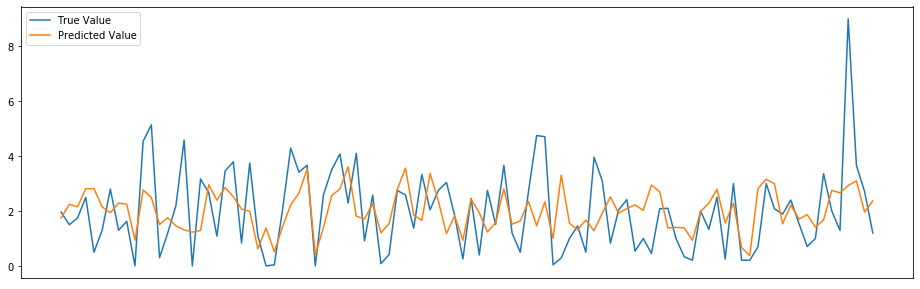

In [19]:
for i in OPTIMIZER:
    print("------------------------------------------\n" + str(i).split("(")[0].split(".")[-1].split(" ")[0]+ "\n------------------------------------------\n")
    model = getmodel(i)
    _ = model.fit(X_train.values, Y_train.values,
          batch_size=64,
          steps_per_epoch=25,
          epochs=25,
          verbose=0,
          callbacks=[myCallbacks()])
    plotter.find_accurracy_on_testset(model, X_test, Y_test,clip=True, plot=True)
    print("\n\n\n\n")